In [ ]:
#dataset used: https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bostondata = pd.read_csv('/content/violations.csv')

In [ ]:
bostondata.head()

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,10,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)"
1,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,10,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)"
2,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.550 A,NaN,"Extermination of Insects, Rodents and Skunks -...",82,NaN,Fisher,AVE,...,10,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)"
3,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,10,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)"
4,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,10,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)"


In [ ]:
bostondata.isnull().sum()

case_no                 0
status_dttm             0
status                  0
code                    0
value               26239
description           222
violation_stno          0
violation_sthigh    21151
violation_street        0
violation_suffix      205
violation_city          1
violation_state         0
violation_zip           8
ward                    0
contact_addr1          55
contact_addr2       21646
contact_city           43
contact_state          47
contact_zip            70
sam_id                  0
latitude                0
longitude               0
location                0
dtype: int64

In [ ]:
#add a column num and make it numeric
bostondata['month']=bostondata['status_dttm'].str.slice(5,7)

In [ ]:
bostondata['month'].unique()

array(['04', '03', '12', '02', '08', '11', '09', '01', '06', '10', '07',
       '05', ''], dtype=object)

In [ ]:
bostondata['month']=pd.to_numeric(bostondata['month'])

In [ ]:
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26239 entries, 0 to 26238
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           26239 non-null  object 
 1   status_dttm       26239 non-null  object 
 2   status            26239 non-null  object 
 3   code              26239 non-null  object 
 4   value             0 non-null      float64
 5   description       26017 non-null  object 
 6   violation_stno    26239 non-null  object 
 7   violation_sthigh  5088 non-null   object 
 8   violation_street  26239 non-null  object 
 9   violation_suffix  26034 non-null  object 
 10  violation_city    26238 non-null  object 
 11  violation_state   26239 non-null  object 
 12  violation_zip     26231 non-null  object 
 13  ward              26239 non-null  object 
 14  contact_addr1     26184 non-null  object 
 15  contact_addr2     4593 non-null   object 
 16  contact_city      26196 non-null  object

In [ ]:
bostondata['month'].value_counts()

1.0     3237
12.0    3091
3.0     2931
2.0     2645
9.0     2535
10.0    1843
6.0     1738
7.0     1705
4.0     1674
11.0    1639
8.0     1613
5.0     1582
Name: month, dtype: int64

In [ ]:
print('Latitude Information : ',bostondata['latitude'].describe())
print('Longitude Information : ',bostondata['longitude'].describe())

Latitude Information :  count    26239.000000
mean        42.320188
std          0.033427
min         42.232100
25%         42.293800
50%         42.317964
75%         42.346764
max         42.392962
Name: latitude, dtype: float64
Longitude Information :  count    26239.000000
mean       -71.082626
std          0.031837
min        -71.181830
25%        -71.097930
50%        -71.079140
75%        -71.062255
max        -70.995970
Name: longitude, dtype: float64


In [ ]:
bostondata['description'].value_counts()

Failure to Obtain Permit                                                                                                                                                                                                                3450
Unsafe and Dangerous                                                                                                                                                                                                                    3385
Owners Responsibility to Maintain Structural Elements - Structural elements  shall be maintained free from holes, cracks, loose plaster, or other defects.                                                                              3254
Owners Installation/Maintenance Responsibility - All facilities and equipment which are required by owner including but not limited to water, gas, electrical and heating, shall be installed in accordance with all accepted codes.    1700
Maintenance                                         

In [ ]:
labels=['Brighton', 'East Boston', 'Jamaica Plain', 'Dorchester',
       'Mattapan', 'Roslindale', 'Boston', 'South Boston', 'Roxbury',
       'Mission Hill', 'Hyde Park', 'Charlestown', 'Allston',
       'West Roxbury', 'Boston/', 'Chestnut Hill']

In [ ]:
x=bostondata['violation_city'].unique()
x
bostondata['violation_city'].dropna()

0         Mission Hill
1         Mission Hill
2         Mission Hill
3         Mission Hill
4         Mission Hill
             ...      
26234    Jamaica Plain
26235    Jamaica Plain
26236    Jamaica Plain
26237    Jamaica Plain
26238      East Boston
Name: violation_city, Length: 26238, dtype: object

([<matplotlib.patches.Wedge at 0x7fe9ff0b2ee0>,
 [Text(0.5655518864051995, 0.943478173453695, 'Brighton'),
  Text(-0.8735898374457227, 0.66846151415886, 'East Boston'),
  Text(-1.0944410509716067, -0.11044811428071176, 'Jamaica Plain'),
  Text(-0.8518604364061337, -0.695940943533251, 'Dorchester'),
  Text(-0.44916638622254973, -1.0041163067532444, 'Mattapan'),
  Text(-0.06607763470126429, -1.09801354554135, 'Roslindale'),
  Text(0.23369889720962805, -1.0748882850989696, 'Boston'),
  Text(0.4839909817045119, -0.9878019688321659, 'South Boston'),
  Text(0.6953287990502889, -0.8523601710610855, 'Roxbury'),
  Text(0.8611162094333221, -0.684455165698373, 'Mission Hill'),
  Text(0.9861737473487666, -0.4873000513442321, 'Hyde Park'),
  Text(1.0552294817750918, -0.3106295877611651, 'Charlestown'),
  Text(1.0859770618845284, -0.17508232652283073, 'Allston'),
  Text(1.0985961046018289, -0.05555716833755626, 'West Roxbury'),
  Text(1.0999997160840027, -0.0007903259539697207, 'Boston/'),
  Text(1.

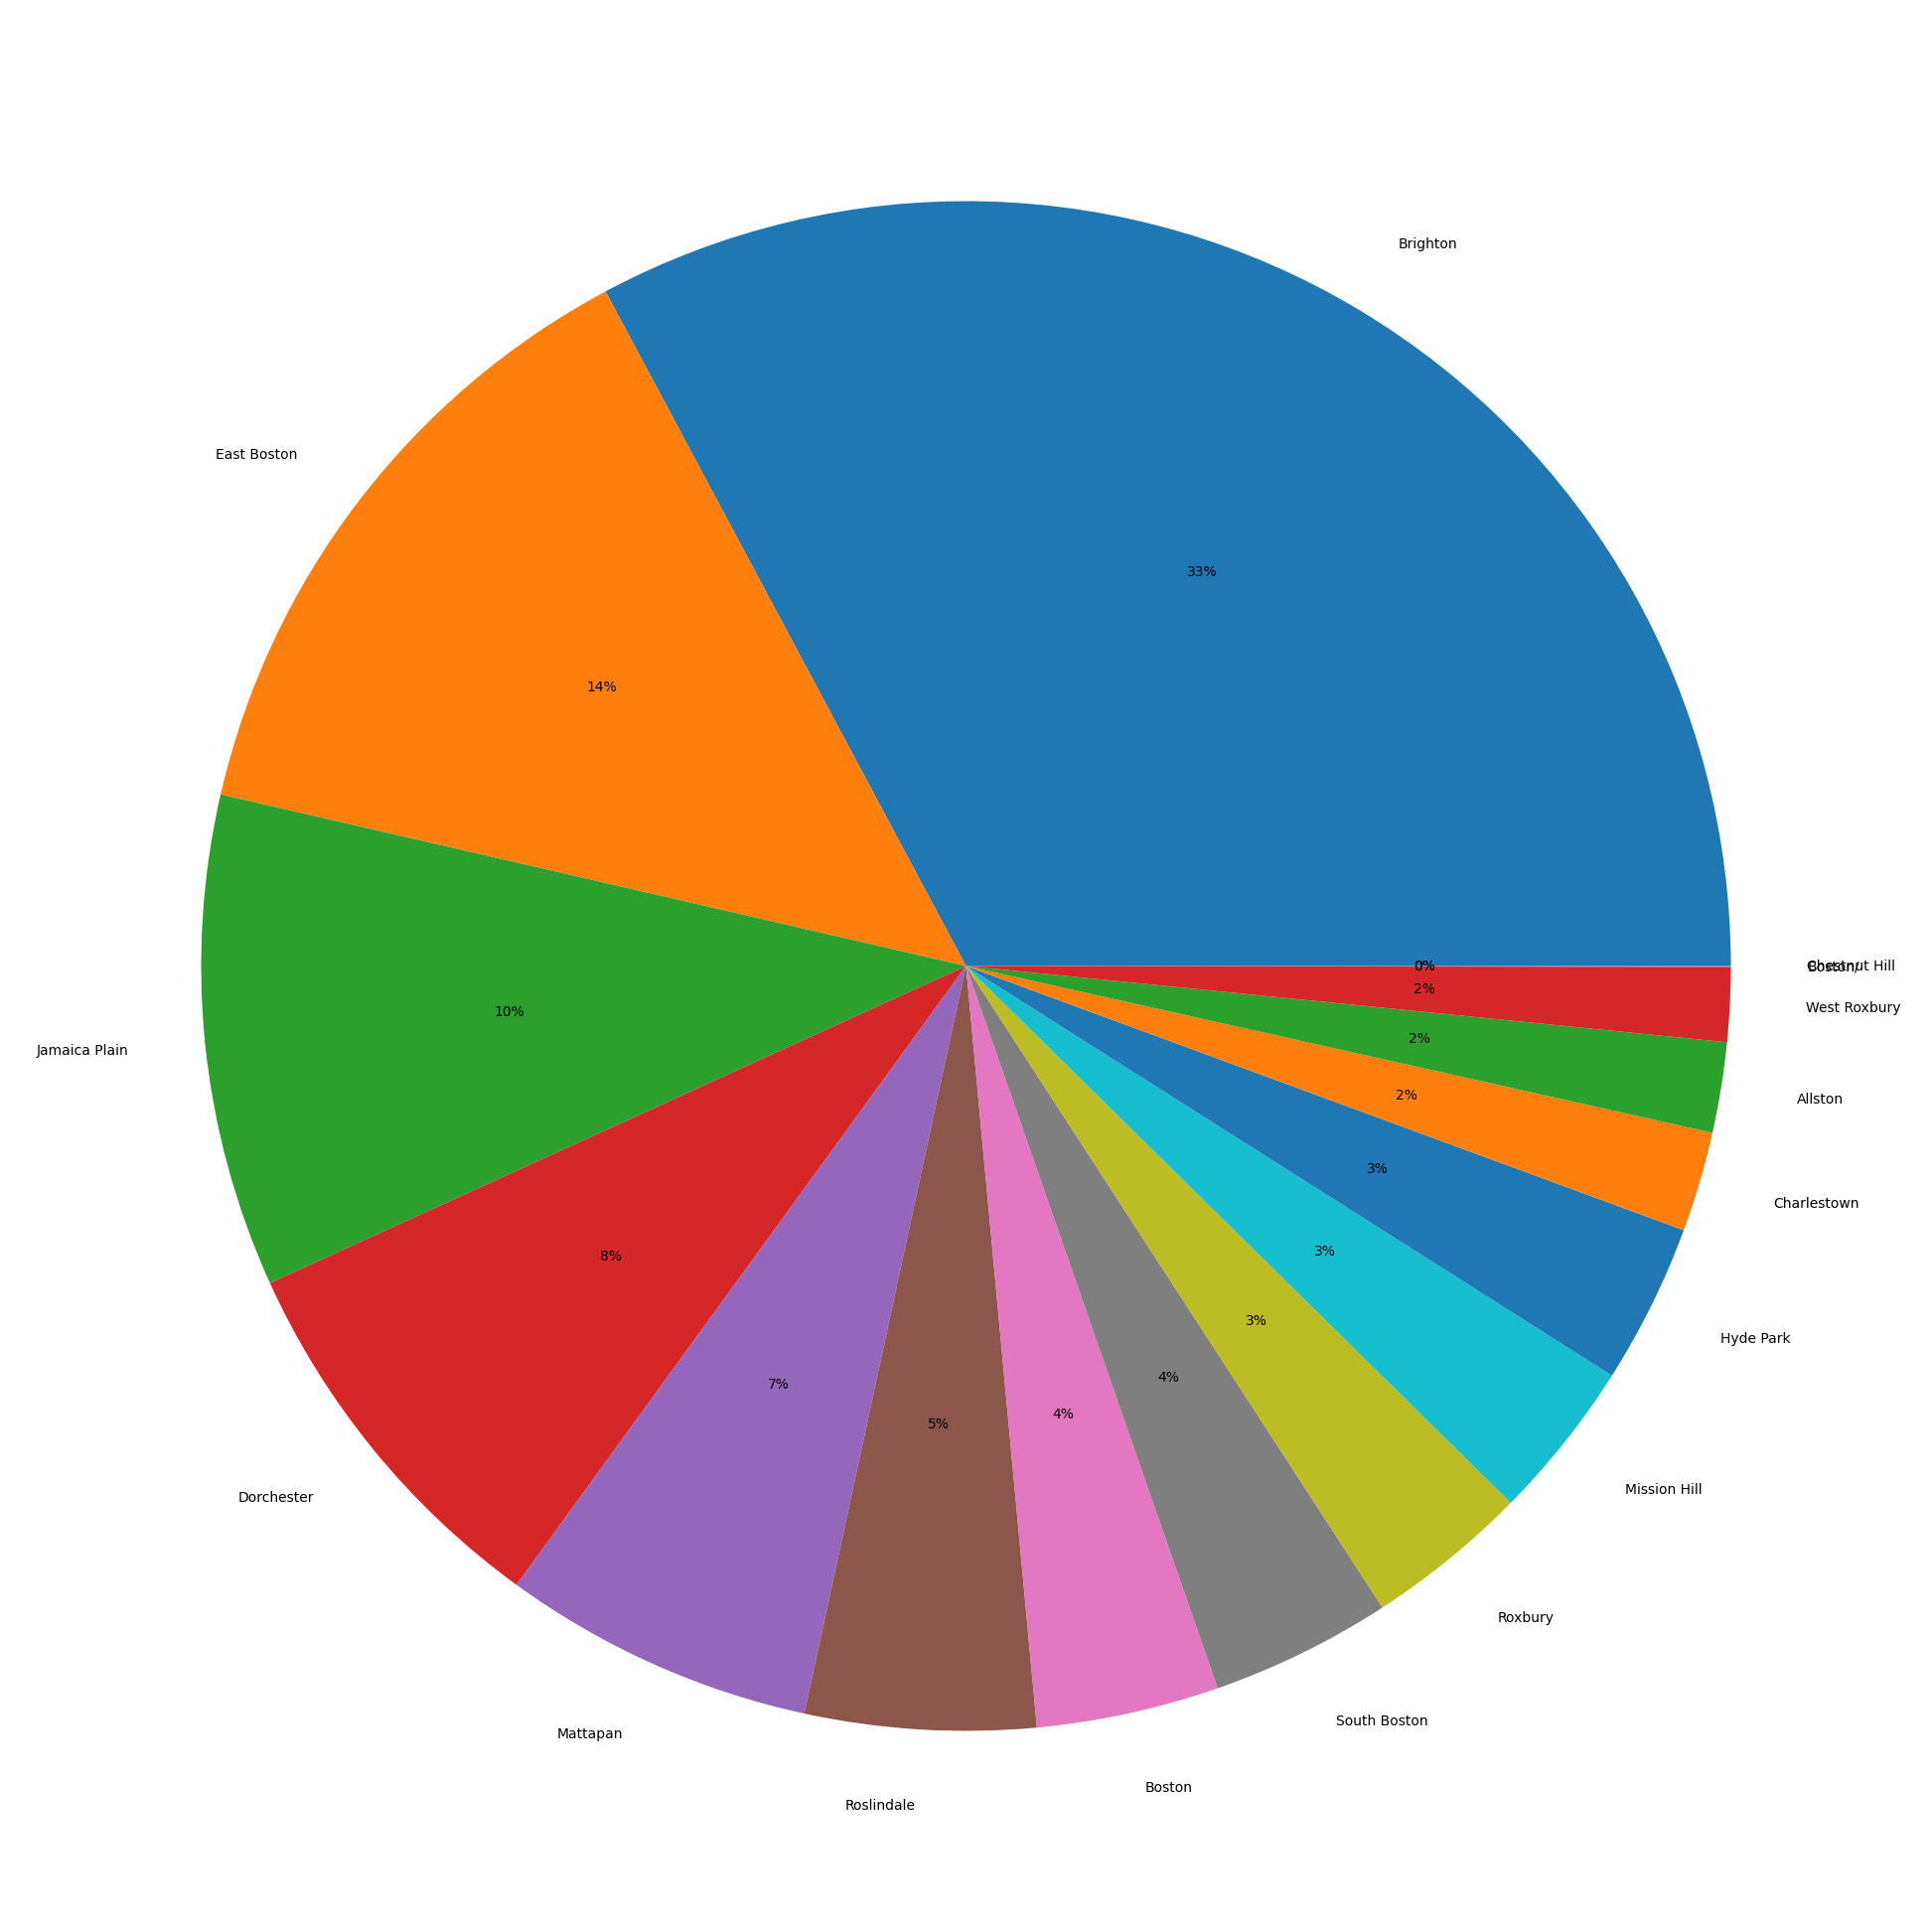

In [ ]:
plt.figure(figsize=(25,25))
plt.pie(bostondata['violation_city'].value_counts(),labels=labels,autopct='%.0f%%')

In [ ]:
bostondata[['violation_city','violation_street']].value_counts()

violation_city  violation_street
Dorchester      Blue Hill           237
East Boston     Chelsea             194
Boston          Beacon              180
Dorchester      Washington          174
East Boston     Saratoga            156
                                   ... 
Hyde Park       B                     1
Dorchester      Lauriat               1
Mission Hill    Mcgreevey             1
                Oswald                1
West Roxbury    Yorktown              1
Length: 2417, dtype: int64

In [ ]:
bostondata.head()

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location,month
0,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)",4.0
1,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)",4.0
2,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.550 A,NaN,"Extermination of Insects, Rodents and Skunks -...",82,NaN,Fisher,AVE,...,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)",4.0
3,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)",4.0
4,HVIOL-659003,2023-04-03 10:00:58,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,82,NaN,Fisher,AVE,...,817 GREENDALE AVENUE,NaN,NEEDHAM,MA,02492,235859,42.32771,-71.10351,"(42.32770999996822, -71.10351000127402)",4.0


In [ ]:
income_data = pd.read_csv('income_data.csv')

In [ ]:
income_data.head()

,Project Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,Abbot Street/ Shawmut Ave,Roxbury,2119.0,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,Academy Homes I,Roxbury,2119.0,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,Academy Homes II,Roxbury,2119.0,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,Adams Court Phase A,Mattapan,2126.0,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,Adams Court Phase B,Mattapan,2126.0,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN


In [ ]:
income_data['Neighborhood'] = income_data['Neighborhood'].str.lower()

grouped_data = income_data.groupby('Neighborhood')['TtlProjUnits'].sum()

# create a new DataFrame from the grouped data
total_data = pd.DataFrame({'Neighborhood': grouped_data.index, 'TotalUnits': grouped_data.values})

In [ ]:
total_data.head()

,Neighborhood,TotalUnits
0,allston,1890
1,back bay,1342
2,bay village,41
3,beacon hill,405
4,brighton,5288


In [ ]:
bostondata['contact_city'] = bostondata['contact_city'].str.lower()

grouped_data = bostondata.groupby('contact_city')['contact_city'].count()

# create a new DataFrame from the grouped data
violation_data = pd.DataFrame({'Neighborhood': grouped_data.index, 'ViolationCounts': grouped_data.values})

violation_data = violation_data.sort_values(by='ViolationCounts', ascending=False).head(15)

In [ ]:
violation_data.head()

,Neighborhood,ViolationCounts
64,boston,5489
170,dorchester,4405
564,roxbury,1199
193,east boston,1120
628,south boston,952


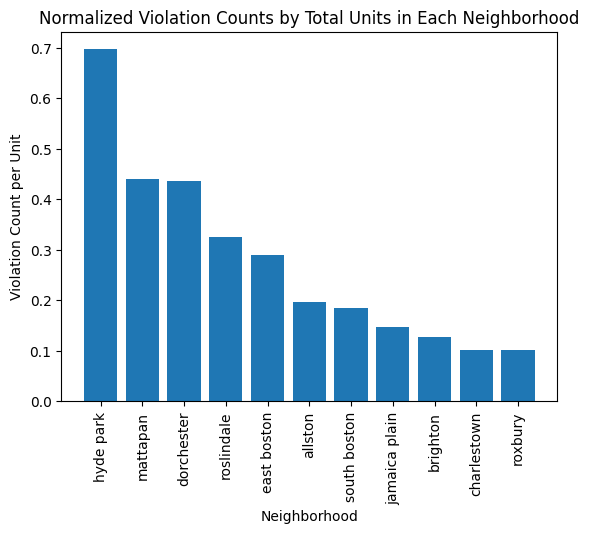

In [ ]:
merged_data = pd.merge(total_data, violation_data, on='Neighborhood')

# calculate the violation count per unit for each neighborhood
merged_data['ViolationCountPerUnit'] = merged_data['ViolationCounts'] / merged_data['TotalUnits']

# sort the data by the violation count per unit in descending order and keep only the top 15
top_data = merged_data.sort_values(by='ViolationCountPerUnit', ascending=False).head(15)

# create a bar chart of the top 15 ratios
plt.bar(top_data['Neighborhood'], top_data['ViolationCountPerUnit'])

# add axis labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('Violation Count per Unit')
plt.title('Normalized Violation Counts by Total Units in Each Neighborhood')

plt.xticks(rotation=90)

# display the chart
plt.show()